In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [302]:
import io
%cd "C:\Users\rakes\OneDrive\Desktop\Big mart data\kaggle"

C:\Users\rakes\OneDrive\Desktop\Big mart data\kaggle


In [303]:
housetrain=pd.read_csv("train.csv")

In [304]:
housetest=pd.read_csv("test.csv")

In [305]:
print(housetrain.shape)
print(housetest.shape)

(1460, 81)
(1459, 80)


In [306]:
housetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [307]:
housetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [308]:
# add dependent variable temporarily to test data
housetest["SalePrice"]="test"

In [309]:
# concatening train & test for preprocessing 
combinedf=pd.concat([housetrain,housetest],axis=0)
# row wise concatenation - axis=0

In [310]:
pd.set_option("display.max_rows",82)
combinedf.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
Utilities           2
BsmtHalfBath        2
BsmtFullBath        2
GarageArea          1
BsmtFinSF1          1
SaleType            1
GarageCars          1
BsmtUnfSF           1
Electrical          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
TotalBsmtSF         1
BsmtFinSF2          1
TotRmsAbvGrd        0
Fireplaces          0
Id                  0
BedroomAbvGr        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal   

In [311]:
# split data into objectcols & numericols
objectcols=combinedf.select_dtypes(include=["object"])
numericcols=combinedf.select_dtypes(include=np.number)

In [312]:
print(objectcols.shape)
print(numericcols.shape)

(2919, 44)
(2919, 37)


In [313]:
objectcols.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
RoofStyle           0
Neighborhood        0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Condition1          0
HouseStyle          0
Condition2          0
Foundation          0
RoofMatl            0
Street              0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SalePrice           0
dtype: int64

In [314]:
combinedf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [315]:
notavailablecols=['Alley','FireplaceQu','PoolQC','Fence', 'MiscFeature']

In [316]:
for col in notavailablecols:objectcols[col]=objectcols[col].fillna("notavailable")

In [317]:
garage_list=[col for col in objectcols if col.startswith("Gar")]
garage_list

['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [318]:
for col in garage_list:
    freq=objectcols[col].value_counts(dropna=False)
    print(freq)

Attchd     1723
Detchd      779
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64
Unf    1230
RFn     811
Fin     719
NaN     159
Name: GarageFinish, dtype: int64
TA     2604
NaN     159
Fa      124
Gd       24
Po        5
Ex        3
Name: GarageQual, dtype: int64
TA     2654
NaN     159
Fa       74
Gd       15
Po       14
Ex        3
Name: GarageCond, dtype: int64


In [319]:
Basement_list=[col for col in objectcols if col.startswith("Bsm")]
Basement_list

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [320]:
for col in Basement_list:
    freq=objectcols[col].value_counts(dropna=False)
    print(freq)

TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64
TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64
No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64
Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [321]:
for col in objectcols.columns:
    objectcols[col]=objectcols[col].fillna(
        objectcols[col].value_counts().idxmax())

In [322]:
numericcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [323]:
numericcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [324]:
categorycols=numericcols[['OverallQual','OverallCond','YearRemodAdd',
                              'YearBuilt','GarageYrBlt','MoSold','YrSold']]

In [325]:
numericcols=numericcols.drop(['OverallQual','OverallCond','YearRemodAdd',
                              'YearBuilt','GarageYrBlt','MoSold','YrSold'],axis=1)

In [326]:
print(categorycols.shape)
print(numericcols.shape)

(2919, 7)
(2919, 30)


In [327]:
categorycols.isnull().sum().sort_values(ascending=False)

GarageYrBlt     159
OverallQual       0
OverallCond       0
YearRemodAdd      0
YearBuilt         0
MoSold            0
YrSold            0
dtype: int64

In [328]:
categorycols.GarageYrBlt=categorycols.GarageYrBlt.fillna(categorycols.GarageYrBlt.value_counts().idxmax())

In [329]:
# median imputation for numeric cols
for col in numericcols.columns:
    numericcols[col]=numericcols[col].fillna(numericcols[col].median())

In [330]:
from sklearn.preprocessing import LabelEncoder

In [331]:
numericcols["SalePrice"]=objectcols.SalePrice

In [332]:
objectcols=objectcols.drop("SalePrice",axis=1)

In [333]:
le=LabelEncoder()

In [334]:
objectcols_encode=objectcols.apply(le.fit_transform)

In [335]:
categorycols_encode=categorycols.apply(le.fit_transform)

In [336]:
# Check for Multicollinearity
numericcols.drop("SalePrice",axis=1).corr()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
Id,1.000000,0.008931,-0.024710,-0.040746,-0.026737,-0.016988,0.018170,-0.014509,-0.024960,-0.008678,...,-0.035236,-0.010066,-0.008847,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244
MSSubClass,0.008931,1.000000,-0.389469,-0.201730,0.006309,-0.064254,-0.072431,-0.125913,-0.219893,-0.248641,...,-0.055151,-0.046564,-0.103389,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867
LotFrontage,-0.024710,-0.389469,1.000000,0.361426,0.200474,0.201697,0.040330,0.106921,0.330765,0.423217,...,0.231731,0.290631,0.338014,0.104364,0.151789,0.011039,0.024882,0.069352,0.161025,0.035161
LotArea,-0.040746,-0.201730,0.361426,1.000000,0.124728,0.194050,0.084107,0.021400,0.254150,0.332460,...,0.261185,0.180415,0.213249,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029
MasVnrArea,-0.026737,0.006309,0.200474,0.124728,1.000000,0.301427,-0.014580,0.087991,0.393662,0.392367,...,0.273129,0.357659,0.370945,0.166606,0.140880,-0.110614,0.014059,0.066392,0.004791,0.045156
BsmtFinSF1,-0.016988,-0.064254,0.201697,0.194050,0.301427,1.000000,-0.055028,-0.477387,0.536471,0.458091,...,0.293095,0.255510,0.310454,0.223511,0.124191,-0.099690,0.050914,0.096837,0.084465,0.093300
BsmtFinSF2,0.018170,-0.072431,0.040330,0.084107,-0.014580,-0.055028,1.000000,-0.238215,0.089423,0.084389,...,0.065707,-0.014753,0.003225,0.098462,-0.005805,0.032775,-0.023268,0.063329,0.044530,-0.005130
BsmtUnfSF,-0.014509,-0.125913,0.106921,0.021400,0.087991,-0.477387,-0.238215,1.000000,0.412291,0.296623,...,0.004881,0.180067,0.164435,-0.039244,0.119804,0.005032,-0.005803,-0.049136,-0.032268,-0.010486
TotalBsmtSF,-0.024960,-0.219893,0.330765,0.254150,0.393662,0.536471,0.089423,0.412291,1.000000,0.801638,...,0.332948,0.437900,0.486021,0.229614,0.245533,-0.085490,0.037897,0.075376,0.072219,0.084005
1stFlrSF,-0.008678,-0.248641,0.423217,0.332460,0.392367,0.458091,0.084389,0.296623,0.801638,1.000000,...,0.407545,0.440452,0.491979,0.227347,0.238502,-0.065796,0.044086,0.098381,0.121900,0.093062


In [337]:
import seaborn as sns

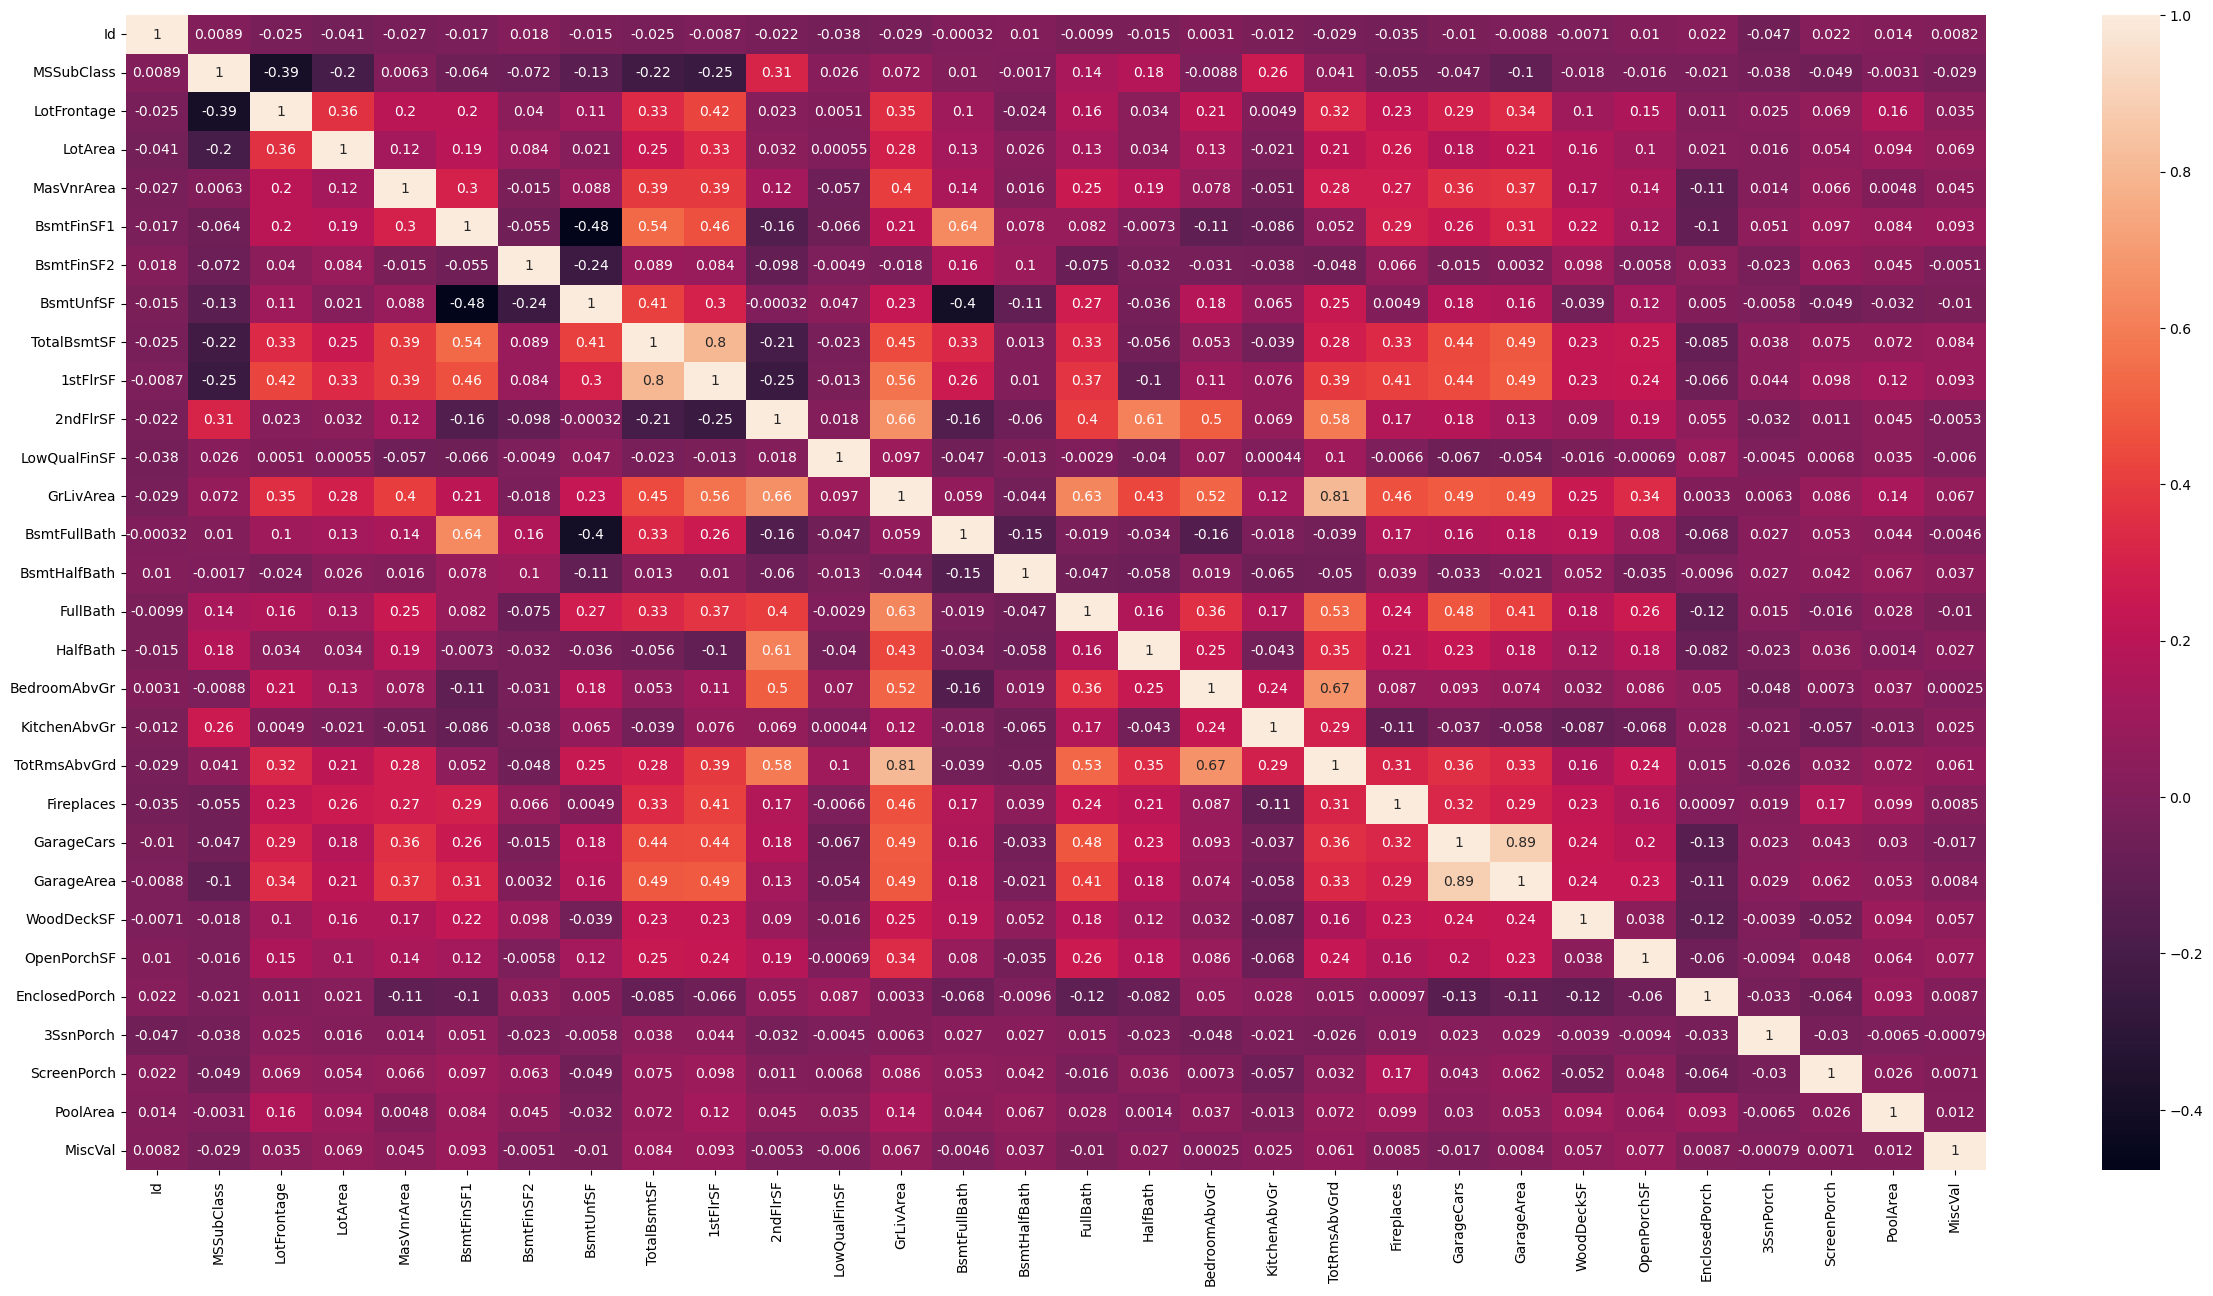

In [338]:
plt.figure(figsize=(30,15))
sns.heatmap(numericcols.drop('SalePrice',axis=1).corr(),annot=True)
plt.show()

In [339]:
numericcols.head()

,Id,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,60,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,...,2.0,548.0,0,61,0,0,0,0,0,208500
1,2,20,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,...,2.0,460.0,298,0,0,0,0,0,0,181500
2,3,60,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,...,2.0,608.0,0,42,0,0,0,0,0,223500
3,4,70,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,...,3.0,642.0,0,35,272,0,0,0,0,140000
4,5,60,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,...,3.0,836.0,192,84,0,0,0,0,0,250000


In [340]:
from sklearn.preprocessing import StandardScaler

In [341]:
Scaler=StandardScaler()

In [342]:
numericcols_scaled=Scaler.fit_transform(numericcols.drop("SalePrice",axis=1))

In [343]:
numericcols_scaled=pd.DataFrame(numericcols_scaled,
columns=numericcols.columns[0:30])

In [344]:
numericcols_scaled=numericcols_scaled.reset_index()

In [345]:
objectcols_encode=objectcols_encode.reset_index()

In [346]:
categorycols_encode=categorycols_encode.reset_index()

In [347]:
combinedf_clean=pd.concat([numericcols_scaled,objectcols_encode,
categorycols_encode],axis=1)

In [348]:
numericcols=numericcols.reset_index()

In [349]:
combinedf_clean['SalePrice']=numericcols.SalePrice

In [350]:
housetrain_df=combinedf_clean[combinedf_clean.SalePrice!='test']
housetest_df=combinedf_clean[combinedf_clean.SalePrice=='test']

In [351]:
housetest_df=housetest_df.drop('SalePrice',axis=1)

In [352]:
# split data into x & y 
y=housetrain_df.SalePrice
x=housetrain_df.drop(['Id','SalePrice','index'],axis=1)

In [353]:
housetest_df=housetest_df.drop(['Id','index'],axis=1)

In [354]:
y.dtype

dtype('O')

In [355]:
y=y.astype('int64')

<AxesSubplot:ylabel='Frequency'>

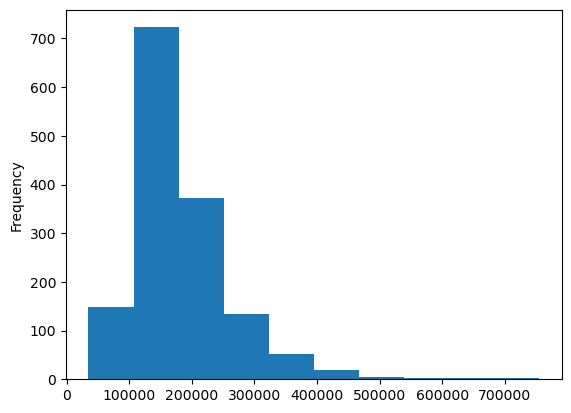

In [356]:
# histogram, boxplot & density curve for y 
y.plot(kind="hist")

<AxesSubplot:>

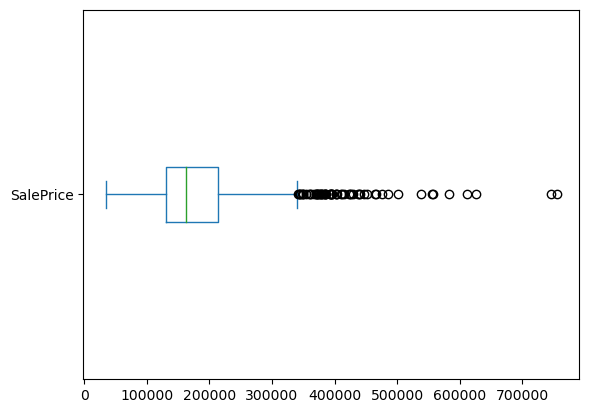

In [357]:
y.plot(kind="box",vert=False)

<AxesSubplot:>

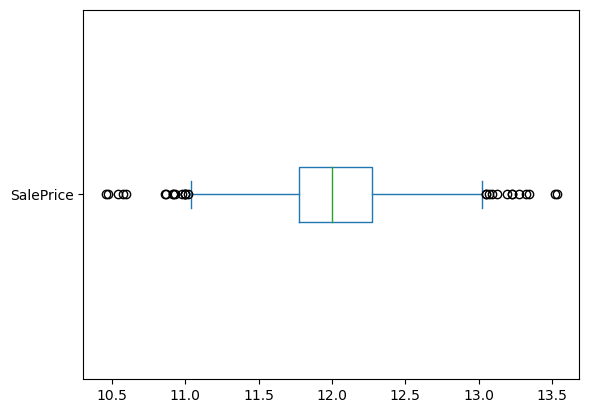

In [359]:
np.log(y).plot(kind="box",vert=False)

<AxesSubplot:ylabel='Density'>

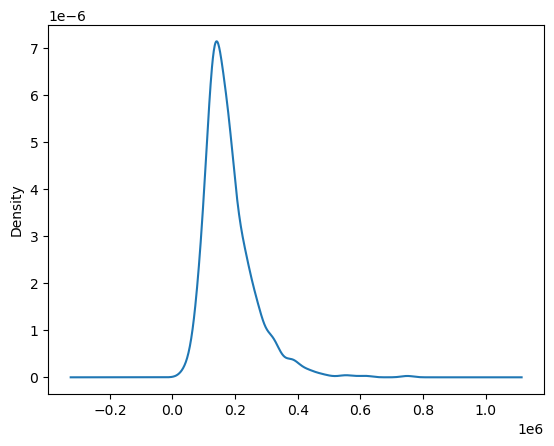

In [358]:
y.plot(kind="density")

In [363]:
from sklearn.linear_model import LinearRegression

In [364]:
reg=LinearRegression()

In [365]:
regmodel=reg.fit(x,y)

In [366]:
regmodel.score(x,y) # R square - 0.85445

0.8545634224507179

In [367]:
regtestpredict=regmodel.predict(housetest_df)

In [368]:
pd.DataFrame(regtestpredict).to_csv("reg.csv")